In [ ]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)                  # For train dataset, 60000 - No. of images, size of the each image - 28 by 28
print(x_test.shape)                   # For test dataset, 10000 - No. of images, size of the each image - 28 by 28     # These are the 3 dimensional array

(60000, 28, 28)
(10000, 28, 28)


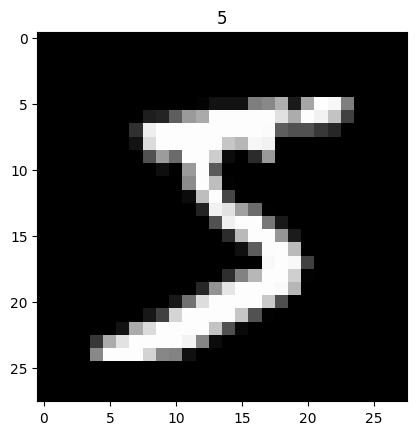

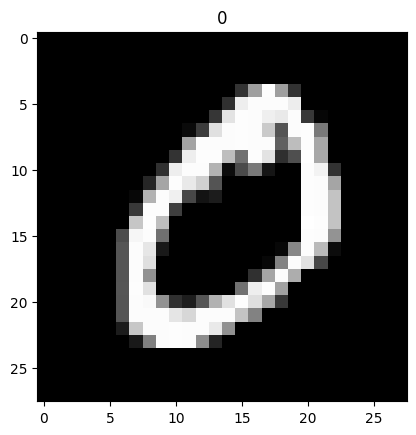

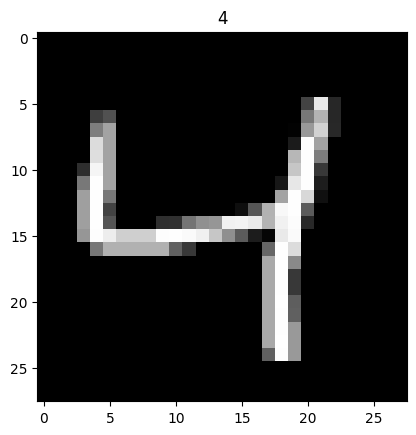

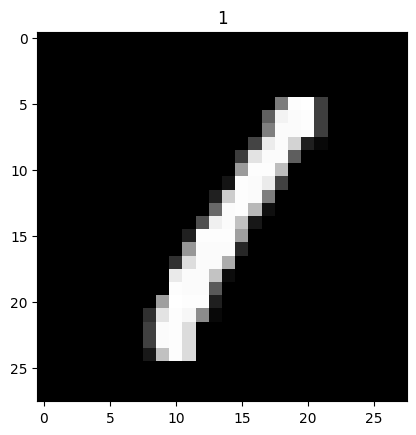

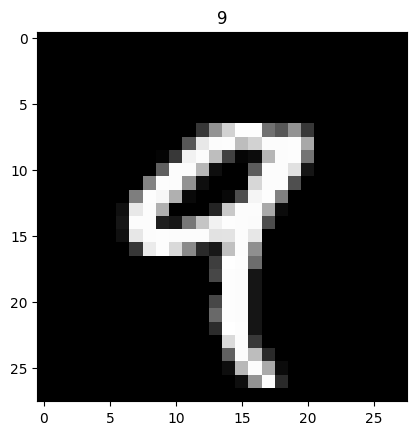

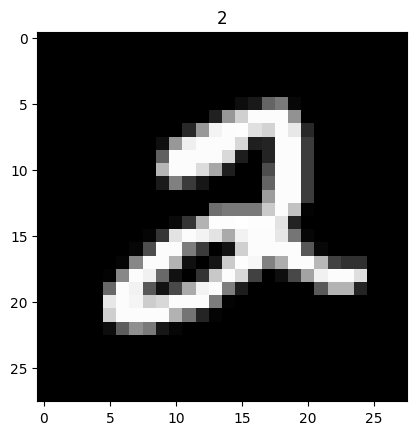

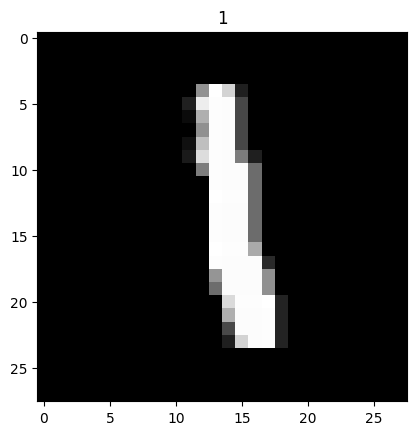

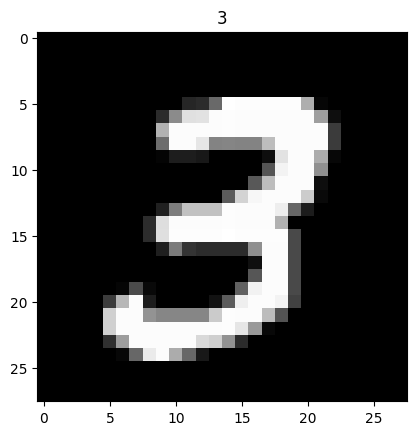

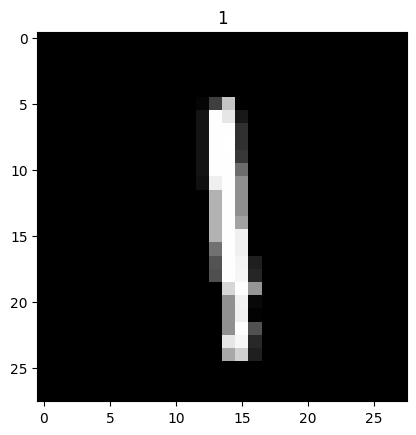

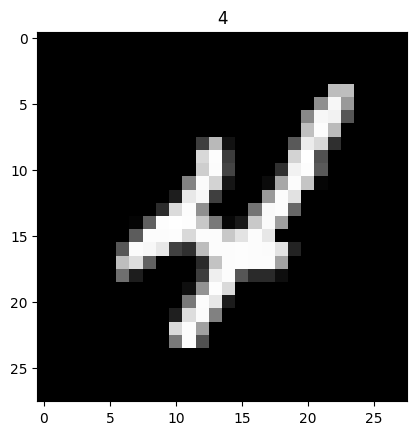

In [ ]:
for i in range(10):                            # 10 - No. of unique values in dataset 0 to 9
    plt.imshow(x_train[i], cmap="gray")
    plt.title(str(y_train[i]))
    plt.show()

In [ ]:
#converting 3D to 2D array for both input and target variables
#Input Variables

x_train = x_train.reshape(60000, 784)/255                 # 28 by 28 = 784
x_test = x_test.reshape(10000, 784)/255                # To get normalized value of dataset, minimax scaling is used. Here whole train and test dataset is
                                                       # divided by 255.

In [ ]:
#Target Variables

print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [ ]:
y_train_ohe = to_categorical(y_train)     # ohe - one hard encoding
y_test_ohe = to_categorical(y_test)       # Target Variables are categorical

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [ ]:
#TENSORFLOW MODEL

In [ ]:
from tensorflow.keras.models import Sequential                                    # To control overfitting, dropout and regularization are used.
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization     # In dropout, randomly dropout the features is happened.
from tensorflow.keras.optimizers import Adam, Adadelta, SGD                       # In regularization, the features which contribute the MSE only dropout.
from tensorflow.keras.regularizers import L1L2                                    # L1 is lasso regularization and L2 is ridge regularization.
                                                                                  # L1 dropout the features and L2 reduce the impact of the weights.

In [ ]:
model = Sequential()
model.add(Input(784)) # Input
model.add(Dense(100,activation="relu",kernel_regularizer = L1L2(l1=0.001,l2=0)))  # Hidden layer
# model.add(Dropout(0.1))
model.add(BatchNormalization())                                                  # Batch Normalization is used to normalize the values after hidden layer.
model.add(Dense(units = 10, activation="softmax")) #Ouput = 10 classes , so 10 units. For multi class classification, softmax is used.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss= "categorical_crossentropy",
              metrics="accuracy")

In [ ]:
model.fit(x = x_train,
          y = y_train_ohe,
          epochs = 60,
          batch_size=2000,
          validation_data=(x_test, y_test_ohe))

Epoch 1/60
30/30 [==============================] - 2s 39ms/step - loss: 3.6548 - accuracy: 0.7260 - val_loss: 3.2845 - val_accuracy: 0.7794
Epoch 2/60
30/30 [==============================] - 1s 28ms/step - loss: 2.1398 - accuracy: 0.9071 - val_loss: 2.3085 - val_accuracy: 0.8539
Epoch 3/60
30/30 [==============================] - 1s 30ms/step - loss: 1.4271 - accuracy: 0.9276 - val_loss: 1.8070 - val_accuracy: 0.9002
Epoch 4/60
30/30 [==============================] - 1s 28ms/step - loss: 1.0484 - accuracy: 0.9388 - val_loss: 1.5412 - val_accuracy: 0.9197
Epoch 5/60
30/30 [==============================] - 1s 44ms/step - loss: 0.7995 - accuracy: 0.9484 - val_loss: 1.3787 - val_accuracy: 0.9329
Epoch 6/60
30/30 [==============================] - 1s 49ms/step - loss: 0.6210 - accuracy: 0.9558 - val_loss: 1.2566 - val_accuracy: 0.9409
Epoch 7/60
30/30 [==============================] - 1s 32ms/step - loss: 0.4943 - accuracy: 0.9605 - val_loss: 1.1814 - val_accuracy: 0.9388
Epoch 8/60
30

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,910
Trainable params: 79,710
Non-trainable params: 200
_________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

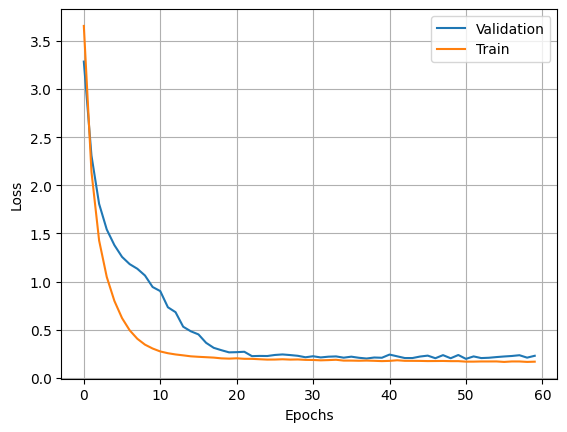

In [ ]:
history = model.history.history
val_loss = history["val_loss"]
val_acc =  history["val_accuracy"]
train_loss = history["loss"]
train_acc= history["accuracy"]


plt.plot(val_loss)
plt.plot(train_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Validation", "Train"])
plt.grid()
plt.show()

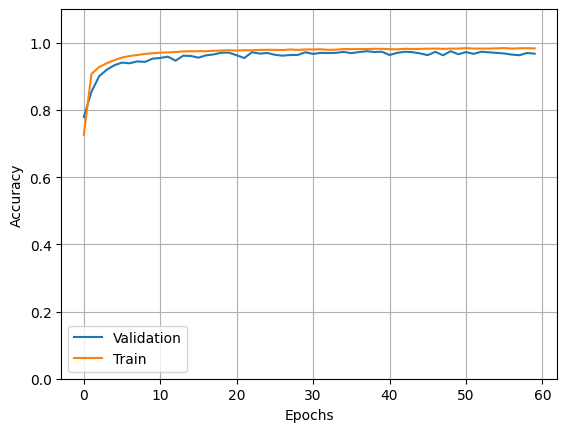

In [ ]:
plt.plot(val_acc)
plt.plot(train_acc)
plt.ylim(0,1.1)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Validation", "Train"])
plt.grid()
plt.show()

In [ ]:
#PREDICTION

In [ ]:
import numpy as np

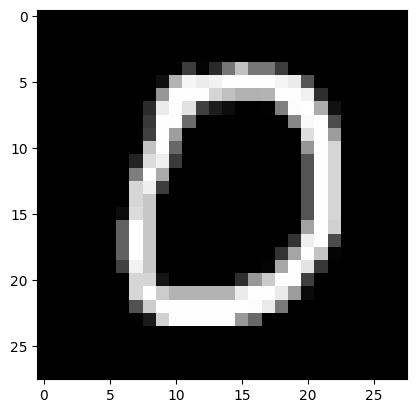

In [ ]:
plt.imshow(x_test.reshape(10000, 28, 28)[10], cmap="gray")
plt.show()

In [ ]:
preds = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print(f"Class = {np.argmax(preds[10])} | Probability = {preds[10][np.argmax(preds[10])]}")           # argmax gives maximum value in the axis.

Class = 0 | Probability = 0.9517309069633484


In [ ]:
x_test[0].reshape(1,784)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  